In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [62]:
pd.set_option('display.max_columns',None)
sns.set(font_scale=1.5,style='darkgrid',palette='bright')
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.figsize']=(16,10)

In [63]:
df=pd.read_excel('churn_analysis_dataset.xlsx')

In [64]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df.columns = df.columns.str.strip()

In [66]:
df[['estimated_salary']] = df[['estimated_salary']].round().astype('int')

In [67]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [68]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [69]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  int32  
 11  churn             10000 non-null  int64  
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 898.6+ KB


In [71]:
df.duplicated().sum()

0

In [72]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101349,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112543,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113932,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93827,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  int32  
 11  churn             10000 non-null  int64  
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 898.6+ KB


In [74]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.236400,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492127,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,12.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.000000,1.000000


In [82]:
df_1=df.drop(['customer_id', 'country', 'gender','churn'],axis=1)

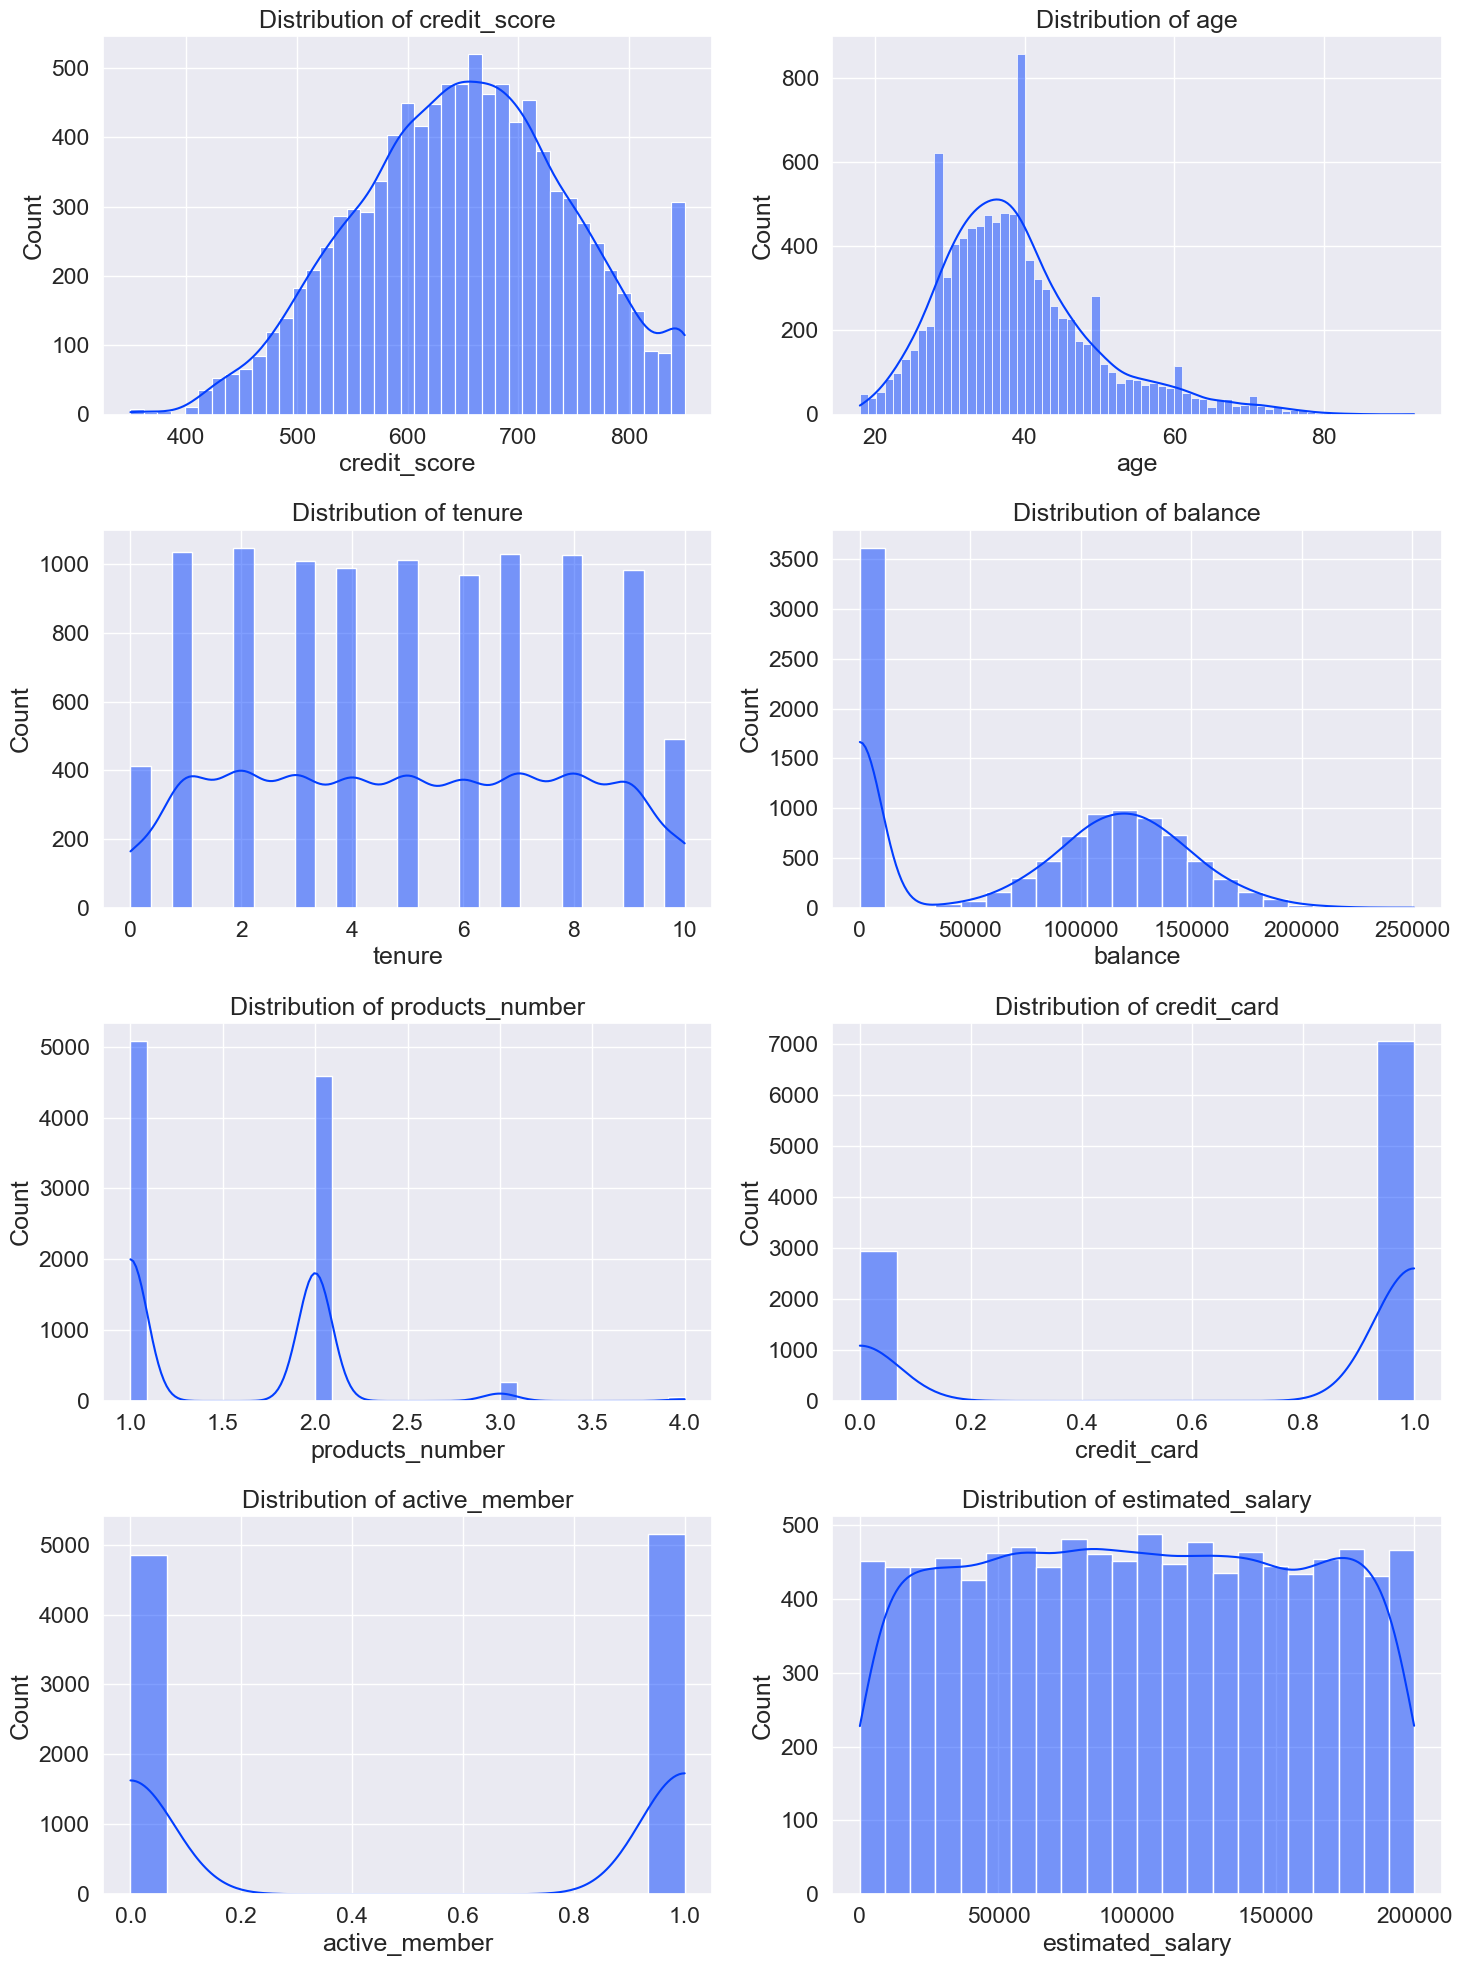

In [83]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten()
for i, column in enumerate(df_1.columns):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<Axes: >

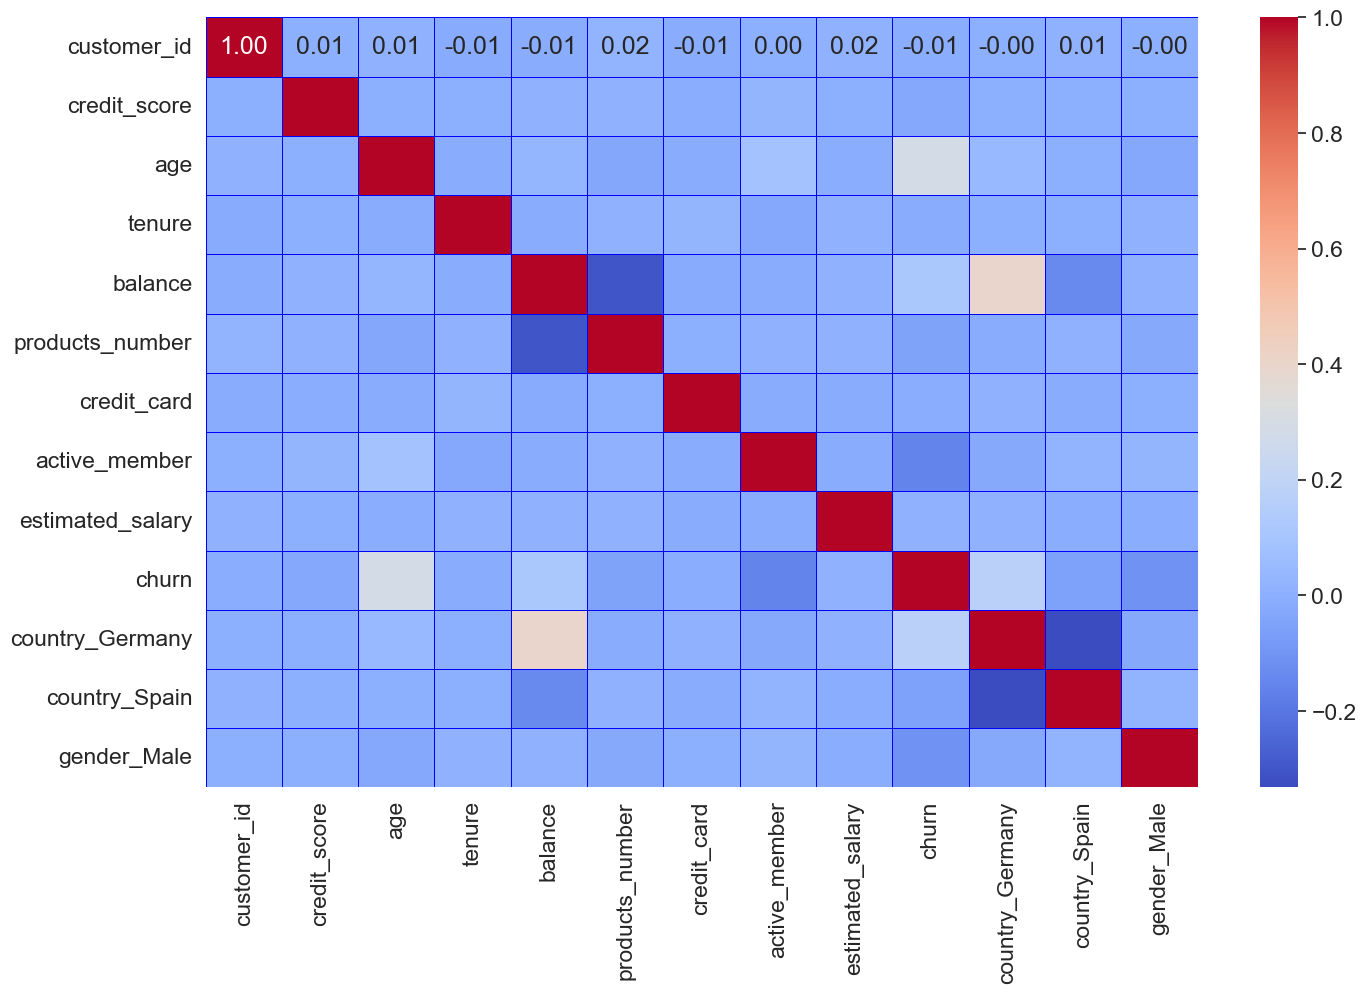

In [78]:
sns.heatmap(df_d.corr(),annot=True, cmap='coolwarm',linecolor='blue',linewidths=0.5,fmt='.2f')

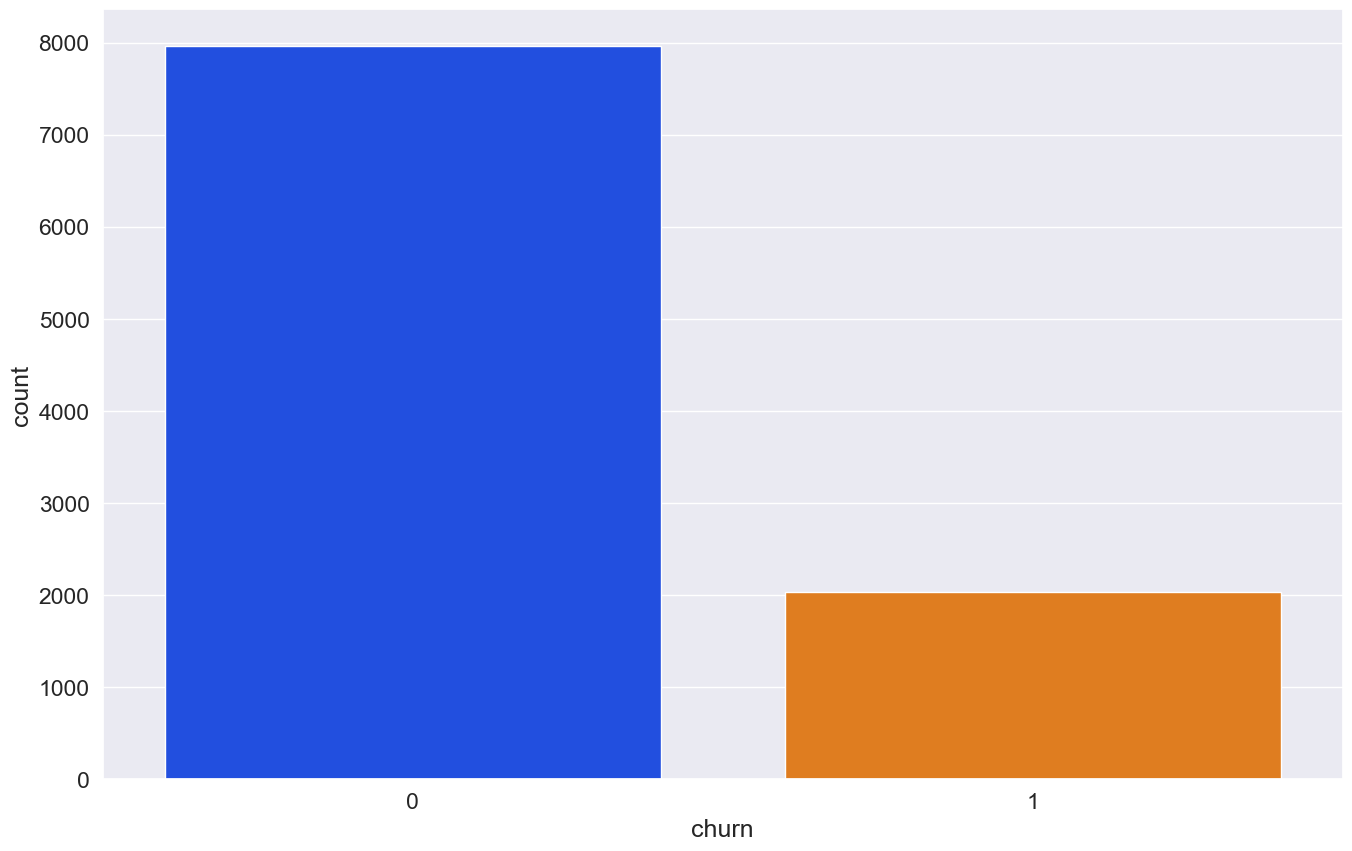

In [75]:
sns.countplot(data=df,x='churn')
plt.show()

In [76]:
df_d = pd.get_dummies(df,df.select_dtypes(include=['object']).columns,drop_first=True)

In [77]:
df_d.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101349,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112543,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113932,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93827,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084,0,False,True,False


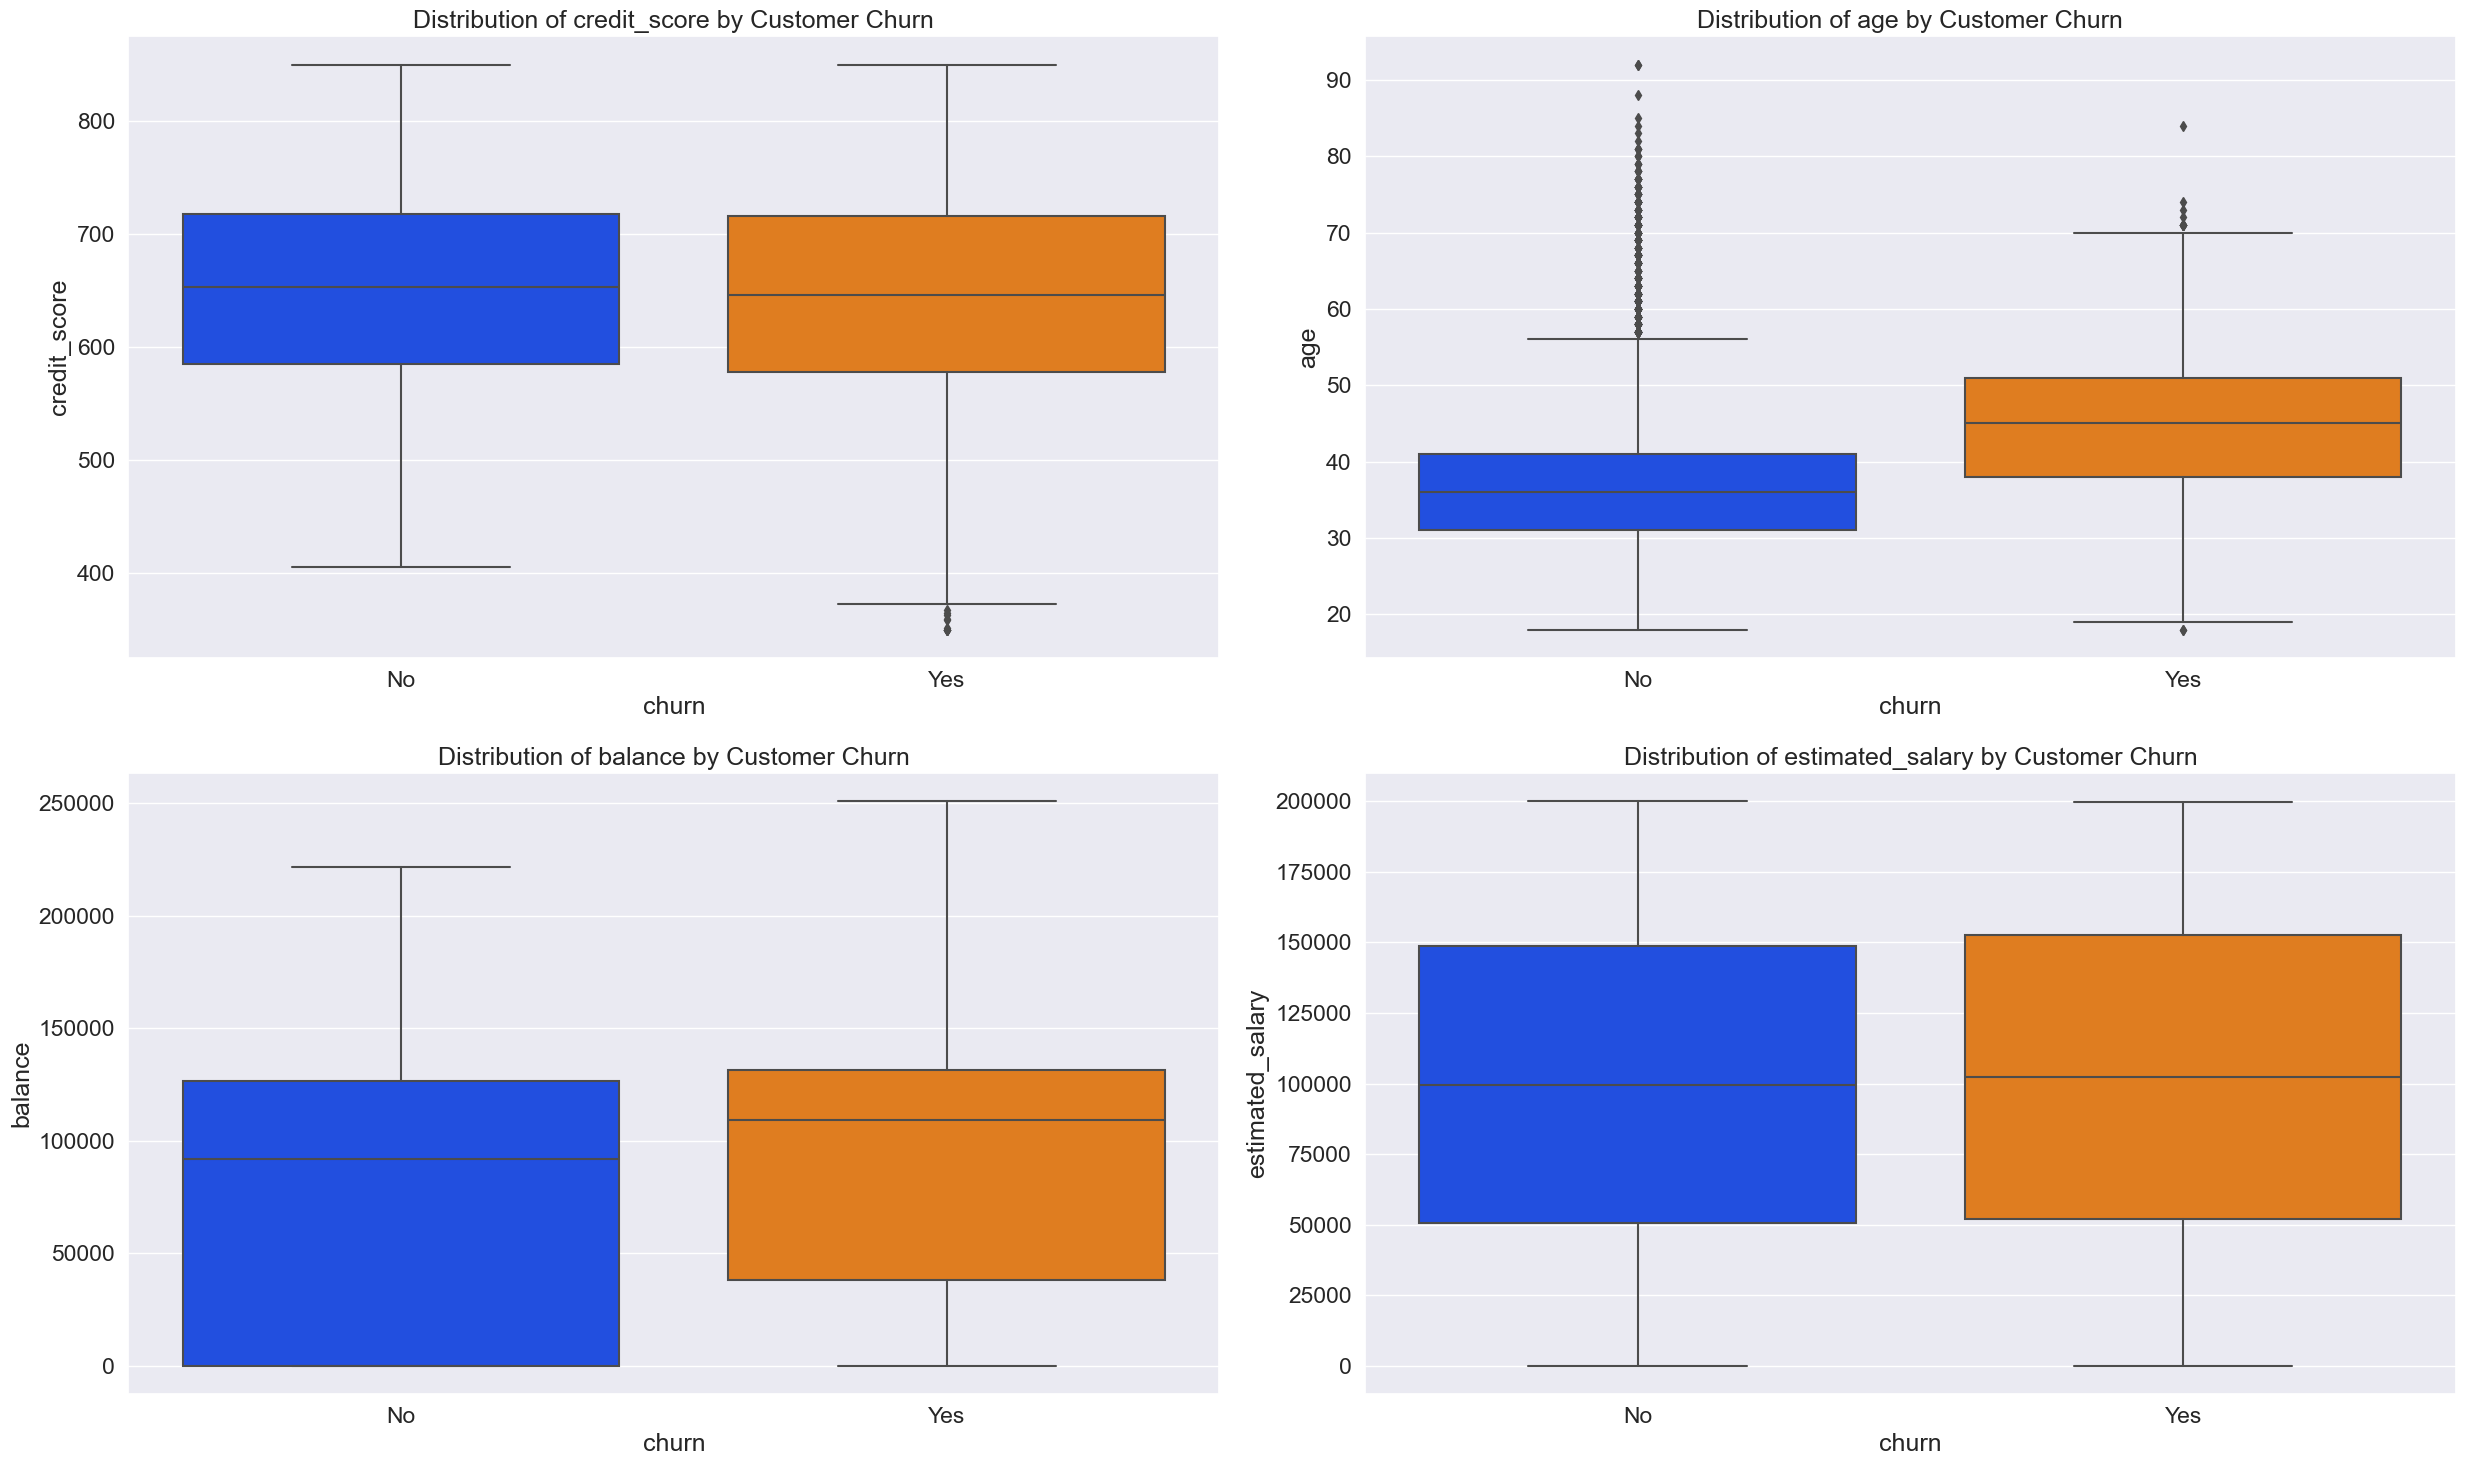

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
axs = axs.flatten()
for i, column in enumerate(['credit_score', 'age', 'balance', 'estimated_salary']):
    sns.boxplot(data=df, x='churn', y=column, ax=axs[i])
    axs[i].set_xticklabels(['No', 'Yes'])
    axs[i].set_title(f'Distribution of {column} by Customer Churn')

plt.tight_layout()
plt.show()

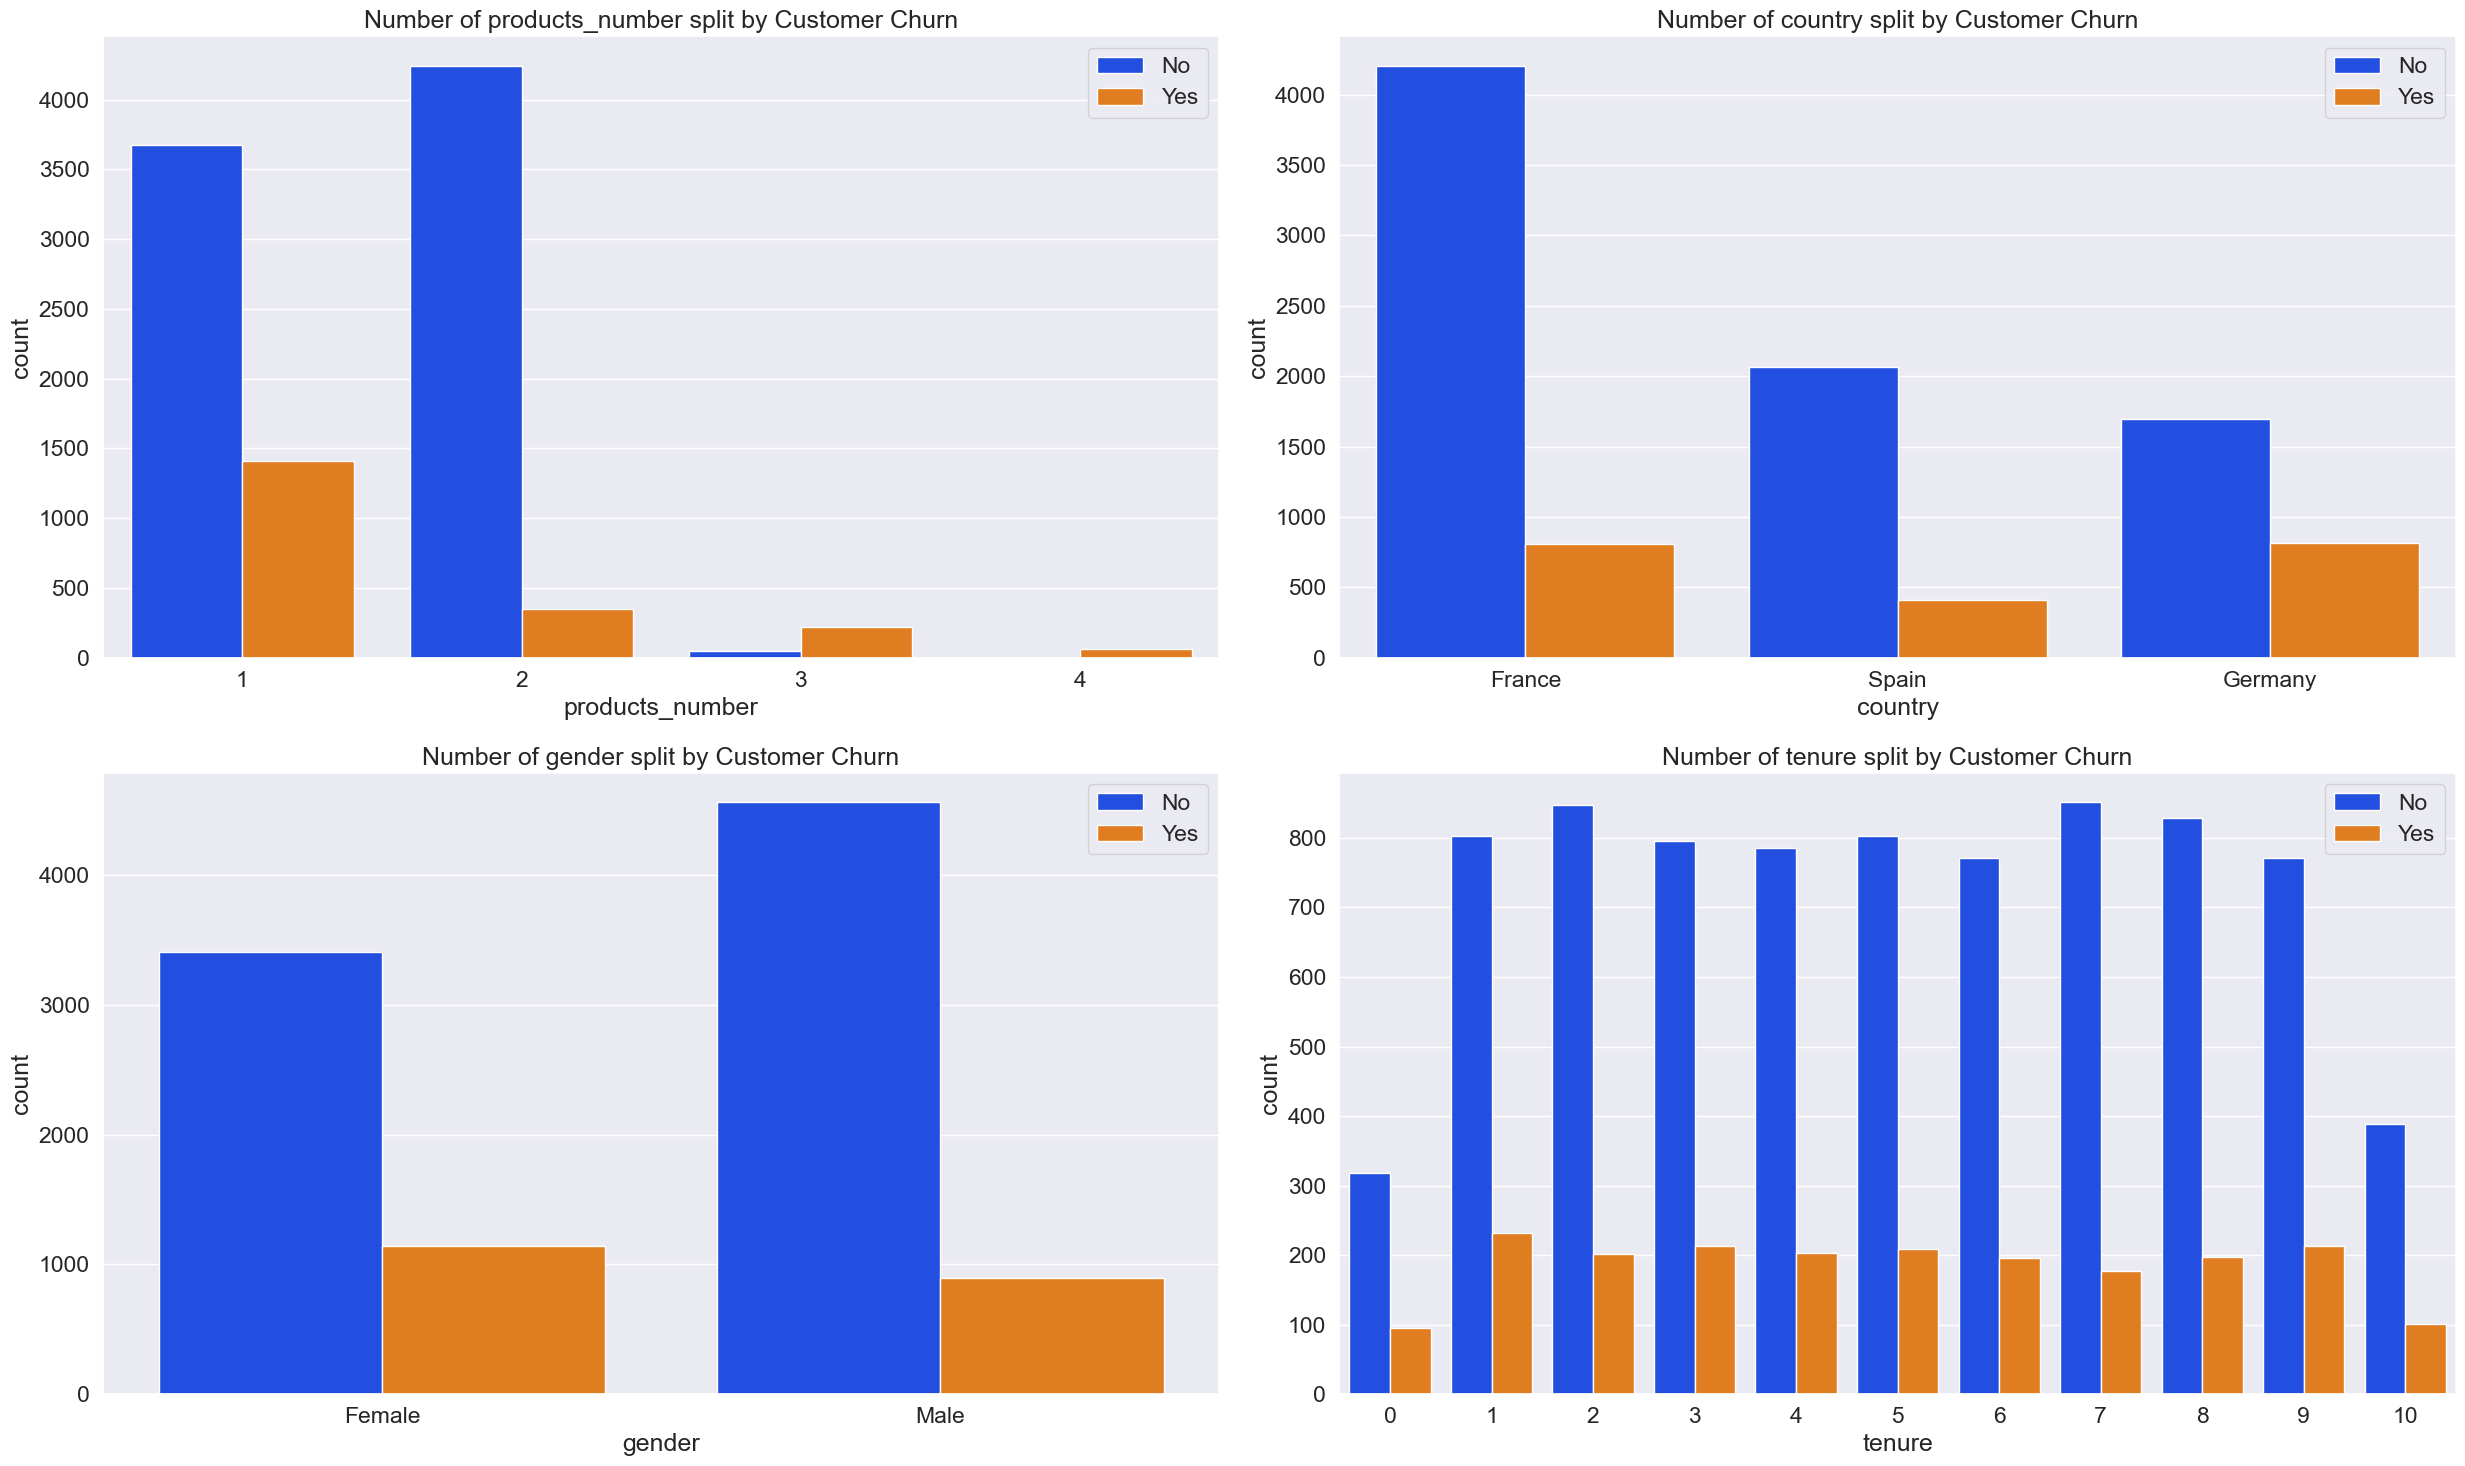

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
axs = axs.flatten()
for i,column in enumerate(['products_number','country','gender','tenure']):
    sns.countplot(data = df, x = column, hue = 'churn',ax=axs[i])
    axs[i].legend(labels=['No', 'Yes'])
    axs[i].set_title(f"Number of {column} split by Customer Churn")
plt.tight_layout()
plt.show()

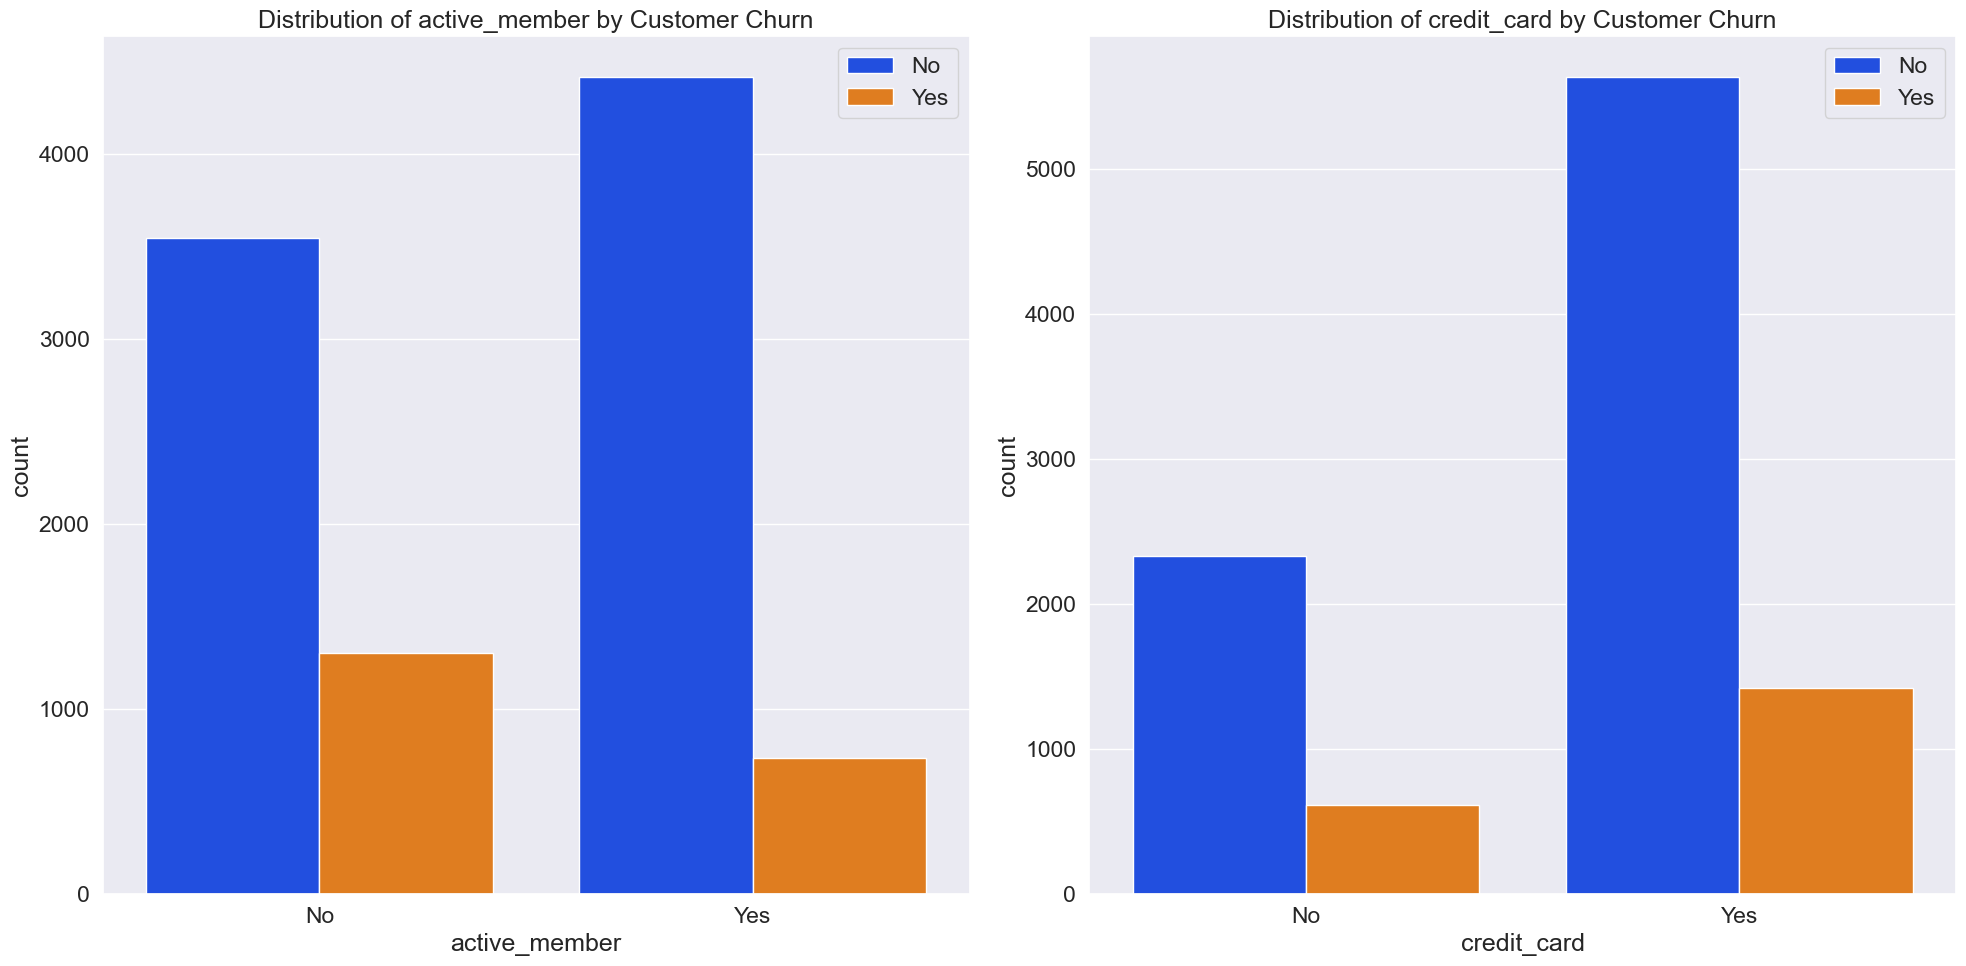

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
for i,column in enumerate(['active_member','credit_card']):
    ax = sns.countplot(data=df, x=column, hue='churn',ax=axs[i])
    ax.set_xticklabels(['No', 'Yes'])
    axs[i].legend(labels=['No', 'Yes'])
    axs[i].set_title(f'Distribution of {column} by Customer Churn')
plt.tight_layout()
plt.show()

In [84]:
df.to_excel('cleaned_churn_analysis.xlsx',index=False)